In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input,Model
import tensorflow as tf

In [2]:
data = pd.read_excel("Iris.xls")

In [3]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_class = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data['species_num'] = [iris_class[i] for i in data.iris]
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
df_train = data.sample(frac = 0.7,random_state=12)
df_valid = data.drop(df_train.index)

In [7]:
df_valid.shape

(45, 6)

In [8]:
X_train = df_train.drop(['petallength','iris','species_num'],axis = 1)
X_valid = df_valid.drop(['petallength','iris','species_num'],axis = 1)

y_train = df_train['petallength']
y_valid = df_valid['petallength']

z_train = df_train['species_num']
z_valid = df_valid['species_num']

In [9]:
print(X_train.shape,y_train.shape,z_train.shape)
print(X_valid.shape,y_valid.shape,z_valid.shape)

(105, 3) (105,) (105,)
(45, 3) (45,) (45,)


In [10]:
inputs = Input(shape=(3,),name='input')
x = Dense(16,activation='relu',name='16')(inputs)
x = Dense(32,activation='relu',name='32')(x)
output1 = Dense(1,name='cont_out')(x)
output2 = Dense(3,activation='softmax',name='cat_out')(x)

In [11]:
model = Model(inputs=inputs,outputs=[output1,output2])

In [12]:
model.compile(loss={'cont_out':'mean_absolute_error',
                   'cat_out':'sparse_categorical_crossentropy'},
             optimizer='adam')

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 3)]          0                                            
__________________________________________________________________________________________________
16 (Dense)                      (None, 16)           64          input[0][0]                      
__________________________________________________________________________________________________
32 (Dense)                      (None, 32)           544         16[0][0]                         
__________________________________________________________________________________________________
cont_out (Dense)                (None, 1)            33          32[0][0]                         
______________________________________________________________________________________________

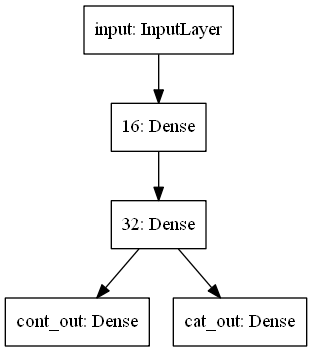

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [15]:
history = model.fit(X_train,{'cont_out':y_train,'cat_out':z_train},
                   validation_data=(X_valid,{'cont_out':y_valid,'cat_out':z_valid}),
                   epochs=100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 2s 61ms/step - loss: 4.5290 - cont_out_loss: 2.3468 - cat_out_loss: 2.1821 - val_loss: 4.2383 - val_cont_out_loss: 2.3959 - val_cat_out_loss: 1.8424
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 4.0497 - cont_out_loss: 2.0310 - cat_out_loss: 2.0187 - val_loss: 3.8315 - val_cont_out_loss: 2.1064 - val_cat_out_loss: 1.7251
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 3.6579 - cont_out_loss: 1.7804 - cat_out_loss: 1.8775 - val_loss: 3.5505 - val_cont_out_loss: 1.9213 - val_cat_out_loss: 1.6292
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 3.4123 - cont_out_loss: 1.6590 - cat_out_loss: 1.7534 - val_loss: 3.3552 - val_cont_out_loss: 1.8099 - val_cat_out_loss: 1.5453
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 3.2313 - cont_out_loss: 1.5912 - cat_out_loss: 1.6401 - val_loss: 3.1923 - val_cont_out_loss: 1.7142 - val_cat_out_loss: 1.4781


Epoch 42/100
4/4 [==============================] - 0s 9ms/step - loss: 1.4304 - cont_out_loss: 0.5530 - cat_out_loss: 0.8774 - val_loss: 1.3975 - val_cont_out_loss: 0.5208 - val_cat_out_loss: 0.8767
Epoch 43/100
4/4 [==============================] - 0s 10ms/step - loss: 1.3985 - cont_out_loss: 0.5312 - cat_out_loss: 0.8674 - val_loss: 1.3629 - val_cont_out_loss: 0.4955 - val_cat_out_loss: 0.8674
Epoch 44/100
4/4 [==============================] - 0s 11ms/step - loss: 1.3540 - cont_out_loss: 0.4949 - cat_out_loss: 0.8591 - val_loss: 1.3159 - val_cont_out_loss: 0.4592 - val_cat_out_loss: 0.8567
Epoch 45/100
4/4 [==============================] - 0s 10ms/step - loss: 1.3092 - cont_out_loss: 0.4591 - cat_out_loss: 0.8501 - val_loss: 1.2810 - val_cont_out_loss: 0.4313 - val_cat_out_loss: 0.8497
Epoch 46/100
4/4 [==============================] - 0s 11ms/step - loss: 1.2682 - cont_out_loss: 0.4304 - cat_out_loss: 0.8378 - val_loss: 1.2516 - val_cont_out_loss: 0.4136 - val_cat_out_loss: 0.8

Epoch 83/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6835 - cont_out_loss: 0.2099 - cat_out_loss: 0.4736 - val_loss: 0.7543 - val_cont_out_loss: 0.2561 - val_cat_out_loss: 0.4982
Epoch 84/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6850 - cont_out_loss: 0.2145 - cat_out_loss: 0.4705 - val_loss: 0.7494 - val_cont_out_loss: 0.2545 - val_cat_out_loss: 0.4949
Epoch 85/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6753 - cont_out_loss: 0.2103 - cat_out_loss: 0.4650 - val_loss: 0.7586 - val_cont_out_loss: 0.2635 - val_cat_out_loss: 0.4951
Epoch 86/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6773 - cont_out_loss: 0.2172 - cat_out_loss: 0.4601 - val_loss: 0.7465 - val_cont_out_loss: 0.2560 - val_cat_out_loss: 0.4905
Epoch 87/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6612 - cont_out_loss: 0.2065 - cat_out_loss: 0.4548 - val_loss: 0.7395 - val_cont_out_loss: 0.2538 - val_cat_out_loss: 0.4

In [18]:
history_df = pd.DataFrame(history.history)
history_df

,loss,cont_out_loss,cat_out_loss,val_loss,val_cont_out_loss,val_cat_out_loss
0,4.528968,2.346840,2.182128,4.238306,2.395901,1.842404
1,4.049661,2.031000,2.018661,3.831524,2.106404,1.725119
2,3.657858,1.780354,1.877504,3.550509,1.921350,1.629160
3,3.412330,1.658960,1.753370,3.355200,1.809926,1.545274
4,3.231350,1.591213,1.640137,3.192290,1.714205,1.478085
...,...,...,...,...,...,...
95,0.621986,0.206377,0.415610,0.703637,0.252367,0.451270
96,0.619000,0.206758,0.412242,0.701584,0.252960,0.448624
97,0.614632,0.206184,0.408449,0.694818,0.252969,0.441849
98,0.609988,0.205820,0.404168,0.694029,0.254497,0.439532


Minimun loss: 0.6067026853561401


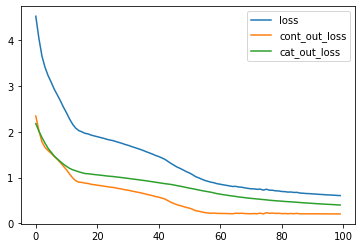

In [19]:
history_df.loc[:,['loss','cont_out_loss','cat_out_loss']].plot()
print("Minimun loss: {}".format(history_df['loss'].min()))

In [20]:
y_z_hat_valid = model.predict(X_valid)

In [21]:
y_z_hat_valid[0][:5]

array([[1.3267771],
       [1.3097765],
       [1.0579454],
       [1.057724 ],
       [1.63243  ]], dtype=float32)

In [22]:
y_z_hat_valid[1][:5]

array([[0.88657725, 0.09699778, 0.01642496],
       [0.92842823, 0.06217298, 0.00939884],
       [0.90670305, 0.08029944, 0.01299754],
       [0.9385188 , 0.05248027, 0.00900087],
       [0.8532523 , 0.12772448, 0.01902329]], dtype=float32)

In [23]:
y_z_hat_valid[0][-5:]

array([[4.7209253],
       [4.529364 ],
       [5.9716935],
       [4.9486437],
       [5.4117856]], dtype=float32)

In [24]:
import numpy as np

In [25]:
z_hat_valid = np.argmax(y_z_hat_valid[1],axis =-1)

In [26]:
z_hat_valid[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
z_hat_valid[-5:]

array([1, 1, 2, 2, 2], dtype=int64)

In [30]:
y_valid[:5]

3     1.5
4     1.4
13    1.1
22    1.0
25    1.6
Name: petallength, dtype: float64

In [31]:
z_train[:5]

40     0
146    2
38     0
99     1
143    2
Name: species_num, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(z_valid,z_hat_valid)

array([[13,  0,  0],
       [ 0, 14,  0],
       [ 0,  5, 13]], dtype=int64)